### Šalių suskirstymas į klasterius naudojantis GDP ir 
### "Volume of exports of goods".

In [74]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import statistics
import time




# Warning suppression
import warnings
warnings.filterwarnings('ignore')

## <font color='blue'> Read data </font> 

In [75]:
#data = pd.read_csv(r'data\OECD_GDP.csv')
data = pd.read_csv(r'data\OECD_GDP.csv')
data.head()


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,GDP,TOT,USD_CAP,A,2020,55690.918600,NaN
1,AUT,GDP,TOT,USD_CAP,A,2020,57253.300563,NaN
2,BEL,GDP,TOT,USD_CAP,A,2020,54539.032525,P
3,CAN,GDP,TOT,USD_CAP,A,2020,47228.372488,NaN
4,CZE,GDP,TOT,USD_CAP,A,2020,42813.741340,NaN


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    62 non-null     object 
 1   INDICATOR   62 non-null     object 
 2   SUBJECT     62 non-null     object 
 3   MEASURE     62 non-null     object 
 4   FREQUENCY   62 non-null     object 
 5   TIME        62 non-null     int64  
 6   Value       62 non-null     float64
 7   Flag Codes  16 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.0+ KB


In [77]:
data2 = pd.read_csv(r'data\OECD_Volume_of_export_goods.csv')
data2.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,TRADEGOOD,EXP,BLN_USD,A,2020,250.8412,NaN
1,AUT,TRADEGOOD,EXP,BLN_USD,A,2020,168.7089,NaN
2,BEL,TRADEGOOD,EXP,BLN_USD,A,2020,420.5612,NaN
3,CAN,TRADEGOOD,EXP,BLN_USD,A,2020,390.9127,NaN
4,CZE,TRADEGOOD,EXP,BLN_USD,A,2020,191.0189,NaN


In [78]:
#data = data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    62 non-null     object 
 1   INDICATOR   62 non-null     object 
 2   SUBJECT     62 non-null     object 
 3   MEASURE     62 non-null     object 
 4   FREQUENCY   62 non-null     object 
 5   TIME        62 non-null     int64  
 6   Value       62 non-null     float64
 7   Flag Codes  16 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.0+ KB


In [79]:
data.drop(['SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME', 'Flag Codes'], axis=1, inplace=True)
data2.drop(['SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME', 'Flag Codes'], axis=1, inplace=True)


In [80]:
data3 = pd.merge(data, data2, on="LOCATION")

In [81]:
data3

,LOCATION,INDICATOR_x,Value_x,INDICATOR_y,Value_y
0,AUS,GDP,55690.918600,TRADEGOOD,250.841200
1,AUT,GDP,57253.300563,TRADEGOOD,168.708900
2,BEL,GDP,54539.032525,TRADEGOOD,420.561200
3,CAN,GDP,47228.372488,TRADEGOOD,390.912700
4,CZE,GDP,42813.741340,TRADEGOOD,191.018900
5,DNK,GDP,60840.940164,TRADEGOOD,107.323300
6,FIN,GDP,52289.303157,TRADEGOOD,66.128270
7,FRA,GDP,47823.919578,TRADEGOOD,488.128300
8,DEU,GDP,56476.934309,TRADEGOOD,1376.126000
9,GRC,GDP,28413.784684,TRADEGOOD,35.284360


In [82]:
# data3 = data3.dropna().reset_index(drop=True)

In [83]:
df_c = data3[ (data3['LOCATION'] != 'OECD') & (data3['LOCATION'] != 'EU27_2020') & (data3['LOCATION'] != 'EA19')]

In [84]:
df_c.drop(['LOCATION', 'INDICATOR_x', 'INDICATOR_y'], axis=1, inplace=True)
df_c.reset_index(drop=True, inplace=True)


In [85]:
df_c

,Value_x,Value_y
0,55690.918600,250.841200
1,57253.300563,168.708900
2,54539.032525,420.561200
3,47228.372488,390.912700
4,42813.741340,191.018900
5,60840.940164,107.323300
6,52289.303157,66.128270
7,47823.919578,488.128300
8,56476.934309,1376.126000
9,28413.784684,35.284360


In [86]:
df_c.isna().sum()
df_c.head()
df_c.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Value_x  43 non-null     float64
 1   Value_y  43 non-null     float64
dtypes: float64(2)
memory usage: 816.0 bytes


### K-Means 

In [91]:
# 1. K-Means
# k_means = KMeans(n_clusters=5, random_state=10)
# k_means.fit(df_c[["Value_x", "Value_y"]])

In [92]:
# define X
X = df_c[["Value_x","Value_y"]]

In [93]:
# K-means with 5 clusters
from sklearn.cluster import KMeans

# initial k-means to 5 clusters, and fit it
km = KMeans(n_clusters=5).fit(X)

In [94]:
km.labels_


array([3, 3, 3, 0, 0, 3, 3, 0, 3, 2, 2, 3, 1, 0, 0, 0, 1, 4, 3, 0, 3, 2,
       2, 2, 0, 3, 3, 2, 0, 3, 4, 4, 4, 0, 0, 2, 0, 4, 2, 0, 0, 4, 4])

In [95]:
# save the cluster labels and sort by cluster
df_c['cluster'] = km.labels_
df_c

,Value_x,Value_y,cluster
0,55690.918600,250.841200,3
1,57253.300563,168.708900,3
2,54539.032525,420.561200,3
3,47228.372488,390.912700,0
4,42813.741340,191.018900,0
5,60840.940164,107.323300,3
6,52289.303157,66.128270,3
7,47823.919578,488.128300,0
8,56476.934309,1376.126000,3
9,28413.784684,35.284360,2


In [96]:
# review the cluster centers. What's the command?
from pandas.plotting import scatter_matrix
%matplotlib inline

#Cluster centers for 5 centroids initialized
cluster_centers = km.cluster_centers_

In [97]:
# Group with 3 centroids initialized
df_c.groupby("cluster").mean()

,Value_x,Value_y
cluster,,
0,43128.114642,268.586671
1,106950.165288,96.665420
2,32014.207092,137.007107
3,58845.215449,414.477554
4,18675.259278,461.848394


In [98]:
#save the DataFrame above of cluster centers
centers = df_c.groupby("cluster").mean().reset_index()

In [99]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 10

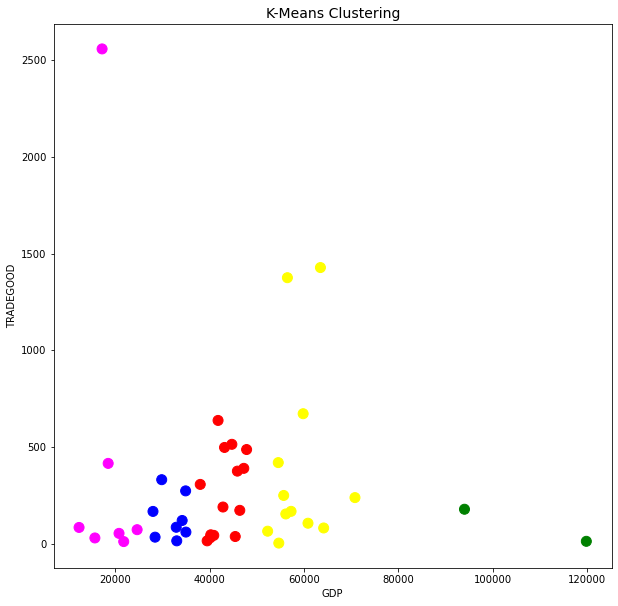

In [100]:
#plt.scatter(centers.Value_x, centers.Value_x, linewidths=5, marker='+', s=300, c='black')
colors = np.array(['red', 'green', 'blue', 'yellow', 'magenta'])
plt.figure(figsize=(10,10))
plt.scatter(df_c['Value_x'],df_c['Value_y'],c=df_c['cluster'],cmap=matplotlib.colors.ListedColormap(colors),s=100)
plt.title('K-Means Clustering',fontsize=14)
plt.xlabel('GDP',fontsize=10)
plt.ylabel('TRADEGOOD',fontsize=10)
plt.show()
# remember to add labels!
#plt.xlabel("GDP")
#plt.ylabel("TRADEGOOD")

In [101]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 5.63892661e-01, -1.23475582e-01],
       [ 6.42159462e-01, -3.00018044e-01],
       [ 5.06189461e-01,  2.41335663e-01],
       [ 1.39965330e-01,  1.77606543e-01],
       [-8.11835739e-02, -2.52062948e-01],
       [ 8.21880608e-01, -4.31965706e-01],
       [ 3.93490310e-01, -5.20513963e-01],
       [ 1.69798986e-01,  3.86570390e-01],
       [ 6.03267754e-01,  2.29531153e+00],
       [-8.02542738e-01, -5.86812603e-01],
       [-5.14847038e-01, -4.01603316e-01],
       [ 5.11741922e-01, -6.52684830e-01],
       [ 2.48441615e+00, -2.76735211e-01],
       [-6.48274453e-02,  4.09656115e-01],
       [-1.33422545e-01,  7.09764093e-01],
       [ 1.32216591e-02,  4.44472676e-01],
       [ 3.77898565e+00, -6.33014189e-01],
       [-1.30082682e+00,  2.32621635e-01],
       [ 7.70511735e-01,  7.84470007e-01],
       [ 4.91103692e-02, -5.79638878e-01],
       [ 9.88486302e-01, -4.84749091e-01],
       [-4.77946414e-01, -7.26436103e-02],
       [-4.75001692e-01, -5.30406964e-01],
       [-5.

In [102]:
#repeat K-means with 5 clusters on scaled data
km = KMeans(n_clusters=5).fit(X_scaled)

In [103]:
df_c["scaled_cluster"] = km.labels_
df_c

,Value_x,Value_y,cluster,scaled_cluster
0,55690.918600,250.841200,3,0
1,57253.300563,168.708900,3,0
2,54539.032525,420.561200,3,0
3,47228.372488,390.912700,0,0
4,42813.741340,191.018900,0,0
5,60840.940164,107.323300,3,0
6,52289.303157,66.128270,3,0
7,47823.919578,488.128300,0,0
8,56476.934309,1376.126000,3,4
9,28413.784684,35.284360,2,2


In [104]:
 # review the cluster centers
df_c.groupby("scaled_cluster").mean()

,Value_x,Value_y,cluster
scaled_cluster,,,
0,52174.794198,288.450964,1.578947
1,17176.865661,2558.431000,4.000000
2,29911.626901,116.805071,2.105263
3,106950.165288,96.665420,1.000000
4,59978.897765,1402.322000,3.000000


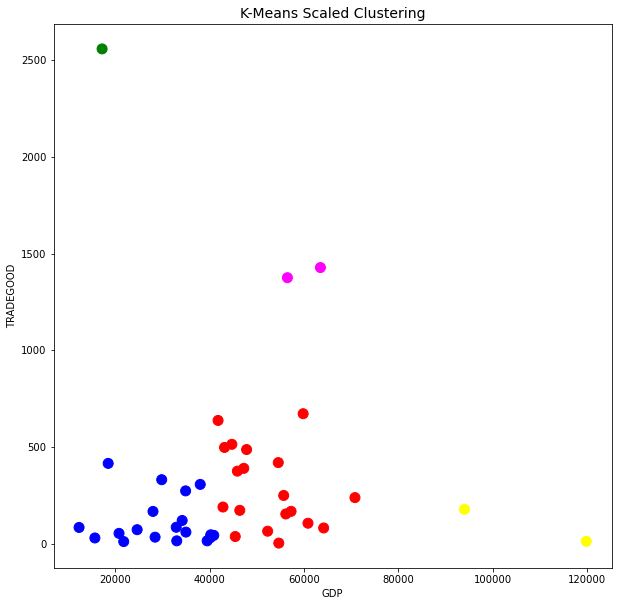

In [106]:
# plt.scatter(centers.Value_x, centers.Value_x, linewidths=5, marker='+', s=300, c='black')
colors = np.array(["red", "green", "blue", "yellow", "magenta"])
plt.figure(figsize=(10, 10))
plt.scatter(
    df_c["Value_x"],
    df_c["Value_y"],
    c=df_c["scaled_cluster"],
    cmap=matplotlib.colors.ListedColormap(colors),
    s=100,
)
plt.title("K-Means Scaled Clustering", fontsize=14)
plt.xlabel("GDP", fontsize=10)
plt.ylabel("TRADEGOOD", fontsize=10)
plt.show()

# plt.xlabel("GDP")
# plt.ylabel("TRADEGOOD")

In [122]:
# DBSCAN

In [176]:
db = DBSCAN(eps=0.3, min_samples=3).fit(X_scaled)

In [177]:
labels = db.labels_

In [178]:
# save the cluster labels and sort by cluster
df_x["cluster_db"] = labels
df_x

,Value_x,Value_y,KMeans_labels,cluster_db
0,0.563893,-0.123476,1,0
1,0.642159,-0.300018,1,0
2,0.506189,0.241336,1,-1
3,0.139965,0.177607,1,1
4,-0.081184,-0.252063,1,2
5,0.821881,-0.431966,1,0
6,0.393490,-0.520514,1,0
7,0.169799,0.386570,1,1
8,0.603268,2.295312,2,-1
9,-0.802543,-0.586813,0,2


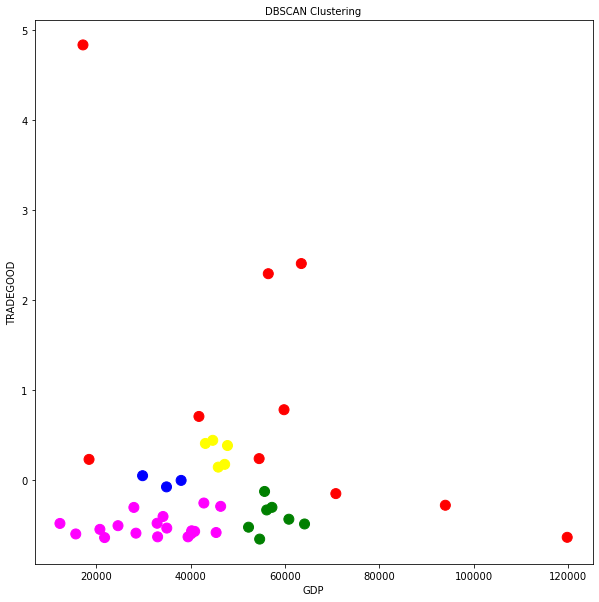

In [179]:
# Plot the clusters
# Plotting the resulting clusters
plt.figure(figsize=(10, 10))
colors = np.array(["red", "green", "yellow", "magenta", "blue"])
plt.scatter(
    df_c["Value_x"],
    df_x["Value_y"],
    c=df_x["cluster_db"],
    cmap=matplotlib.colors.ListedColormap(colors),
    s=100,
)
plt.title("DBSCAN Clustering", fontsize=10)
plt.xlabel("GDP", fontsize=10)
plt.ylabel("TRADEGOOD", fontsize=10)
plt.show()